# Частина 2
​
В цій частині ми знову будемо працювати з датасетом fasion_mnist.


На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.



Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.



Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = np.expand_dims(x_train, axis=-1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test= np.expand_dims(x_test, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape:  (60000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)


In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"]
)

history = model.fit(x_train, y_train, epochs=30, batch_size=130, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - acc: 0.0964 - loss: 0.7902 - val_acc: 0.2463 - val_loss: 0.3582
Epoch 2/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - acc: 0.1763 - loss: 0.3641 - val_acc: 0.5968 - val_loss: 0.2689
Epoch 3/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.3202 - loss: 0.2909 - val_acc: 0.6768 - val_loss: 0.2341
Epoch 4/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - acc: 0.4519 - loss: 0.2541 - val_acc: 0.6997 - val_loss: 0.2099
Epoch 5/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - acc: 0.5222 - loss: 0.2307 - val_acc: 0.7122 - val_loss: 0.1929
Epoch 6/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - acc: 0.5752 - loss: 0.2130 - val_acc: 0.7189 - val_loss: 0.1803
Epoch 7/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - acc: 0.6094 - loss: 0.1997 - val_acc: 0.7261 - val_loss: 0.1706
Epoch 8/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - acc: 0.6320 - loss: 0.1896 - val_acc: 0.7326 - val_loss: 0.1626
Epoch 9/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 25

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,982,486 (57.15 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 133,900 (523.05 KB)

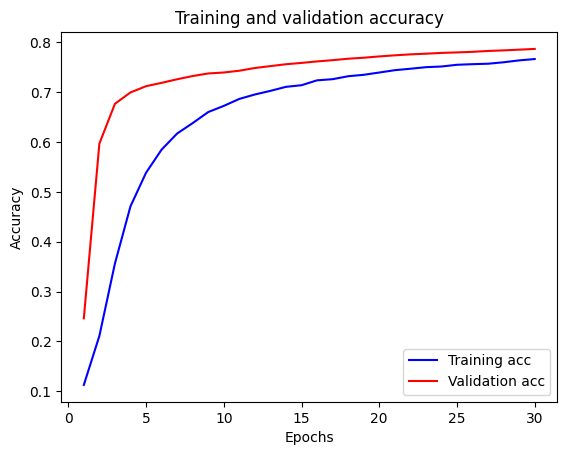

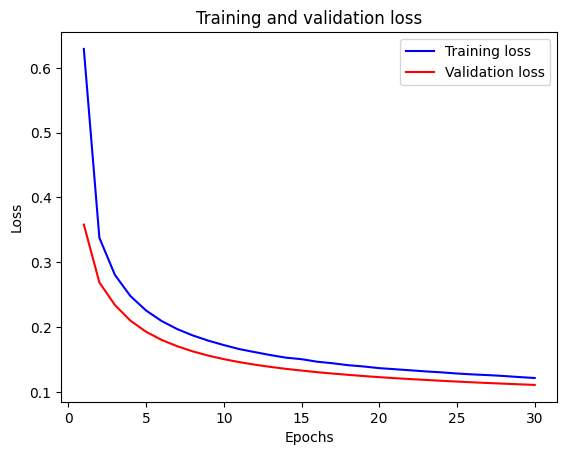

In [6]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'b', label="Training acc")
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [7]:
from keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-4),
    metrics=["acc"]
)

history = model.fit(x_train, y_train, epochs=30, batch_size=130, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - acc: 0.2437 - loss: 0.3914 - val_acc: 0.7347 - val_loss: 0.1752
Epoch 2/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - acc: 0.6515 - loss: 0.1840 - val_acc: 0.7611 - val_loss: 0.1363
Epoch 3/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - acc: 0.7269 - loss: 0.1487 - val_acc: 0.7788 - val_loss: 0.1205
Epoch 4/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - acc: 0.7521 - loss: 0.1331 - val_acc: 0.7900 - val_loss: 0.1114
Epoch 5/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - acc: 0.7663 - loss: 0.1228 - val_acc: 0.7993 - val_loss: 0.1052
Epoch 6/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - acc: 0.7850 - loss: 0.1142 - val_acc: 0.8047 - val_loss: 0.1004
Epoch 7/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - acc: 0.7945 - loss: 0.1079 - val_acc: 0.8088 - val_loss: 0.0970
Epoch 8/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - acc: 0.8027 - loss: 0.1044 - val_acc: 0.8131 - val_loss: 0.0942
Epoch 9/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 2

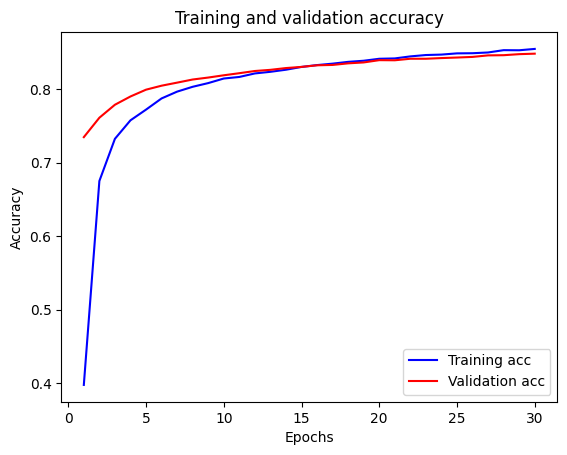

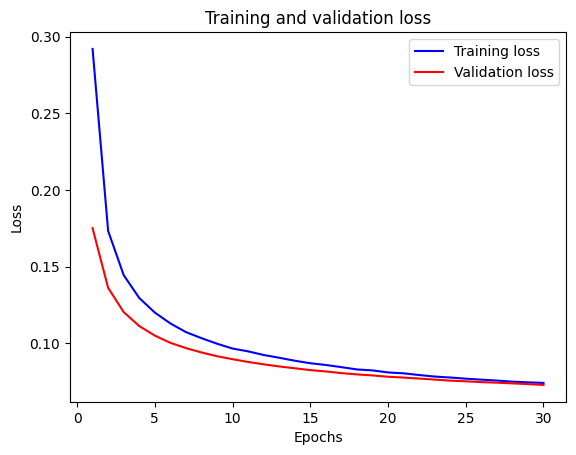

In [8]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'b', label="Training acc")
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

В результаті дослідження та порівняння двох методів навчання, а саме, першого завдання - СNN та з VGG16, бачимо, що СNN має краще точночніст ніж VGG16.
Перенавчання не спотстерігається

In [10]:
from tensorflow.keras.models import save_model

In [11]:
model.save('model_vgg16.h5')  # Збереження в HDF5 форматі

In [12]:
from google.colab import files

files.download('model_vgg16.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>